In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns; sns.set()

%matplotlib inline

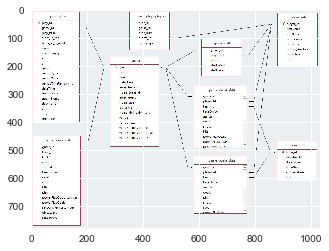

In [2]:
#Display the table relationship diagram
img=mpimg.imread('data/table_relationships.JPG')
imgplot = plt.imshow(img)
plt.show()

In [3]:
#Read in all CSV files from repository
game = pd.read_csv('data/game.csv')
game_goalie_stats = pd.read_csv('data/game_goalie_stats.csv')
game_plays = pd.read_csv('data/game_plays.csv')
game_plays_players = pd.read_csv('data/game_plays_players.csv')
game_shifts = pd.read_csv('data/game_shifts.csv')
game_skater_stats = pd.read_csv('data/game_skater_stats.csv')
game_teams_stats = pd.read_csv('data/game_teams_stats.csv')
player_info = pd.read_csv('data/player_info.csv')
team_info = pd.read_csv('data/team_info.csv')

In [4]:
#create dataframe of goalie with team name and player name
goalie_team = pd.merge(game_goalie_stats, team_info, on = 'team_id')
goalie_team = pd.merge(goalie_team, player_info, on = 'player_id')
#create dataframe of player with team name and player name
skater_team = pd.merge(game_skater_stats, team_info, on = 'team_id')
skater_team = pd.merge(skater_team, player_info, on = 'player_id')

In [5]:
skater_team.columns

Index(['game_id', 'player_id', 'team_id', 'timeOnIce', 'assists', 'goals',
       'shots', 'hits', 'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes',
       'faceOffWins', 'faceoffTaken', 'takeaways', 'giveaways',
       'shortHandedGoals', 'shortHandedAssists', 'blocked', 'plusMinus',
       'evenTimeOnIce', 'shortHandedTimeOnIce', 'powerPlayTimeOnIce',
       'franchiseId', 'shortName', 'teamName', 'abbreviation', 'link_x',
       'firstName', 'lastName', 'nationality', 'birthCity', 'primaryPosition',
       'birthDate', 'link_y'],
      dtype='object')

In [6]:
game_plays.columns

Index(['play_id', 'game_id', 'play_num', 'team_id_for', 'team_id_against',
       'event', 'secondaryType', 'x', 'y', 'period', 'periodType',
       'periodTime', 'periodTimeRemaining', 'dateTime', 'goals_away',
       'goals_home', 'description', 'st_x', 'st_y', 'rink_side'],
      dtype='object')

In [7]:
game_plays.describe()

,game_id,play_num,team_id_for,team_id_against,x,y,period,periodTime,periodTimeRemaining,goals_away,goals_home,st_x,st_y
count,2.369646e+06,2.369646e+06,1.907922e+06,1.907922e+06,1.903140e+06,1.903157e+06,2.369646e+06,2.369646e+06,2.369646e+06,2.369646e+06,2.369646e+06,1.903140e+06,1.903157e+06
mean,2.014707e+09,1.648367e+02,1.762862e+01,1.755894e+01,2.861891e-01,-2.097951e-01,2.026005e+00,5.857356e+02,5.979063e+02,1.194952e+00,1.322649e+00,8.497122e+00,1.519691e-01
std,1.635618e+06,9.749416e+01,1.229775e+01,1.228052e+01,6.428901e+01,2.307910e+01,8.716109e-01,3.659118e+02,3.639756e+02,1.285669e+00,1.379465e+00,6.372565e+01,2.307955e+01
min,2.012020e+09,1.000000e+00,1.000000e+00,1.000000e+00,-9.900000e+01,-4.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-4.200000e+01
25%,2.013021e+09,8.200000e+01,8.000000e+00,8.000000e+00,-6.900000e+01,-2.200000e+01,1.000000e+00,2.650000e+02,2.820000e+02,0.000000e+00,0.000000e+00,-6.300000e+01,-2.200000e+01
50%,2.015020e+09,1.630000e+02,1.600000e+01,1.600000e+01,0.000000e+00,0.000000e+00,2.000000e+00,5.790000e+02,5.980000e+02,1.000000e+00,1.000000e+00,3.000000e+01,0.000000e+00
75%,2.016021e+09,2.440000e+02,2.400000e+01,2.400000e+01,6.900000e+01,2.200000e+01,3.000000e+00,9.030000e+02,9.140000e+02,2.000000e+00,2.000000e+00,6.900000e+01,2.200000e+01
max,2.017030e+09,6.810000e+02,5.400000e+01,5.400000e+01,9.900000e+01,4.200000e+01,6.000000e+00,1.200000e+03,1.200000e+03,9.000000e+00,1.000000e+01,9.900000e+01,4.200000e+01


In [8]:
#merge the game home_team_id to the game_plays
game_plays = pd.merge(game_plays, game, on = 'game_id')

In [9]:
game_plays.columns

Index(['play_id', 'game_id', 'play_num', 'team_id_for', 'team_id_against',
       'event', 'secondaryType', 'x', 'y', 'period', 'periodType',
       'periodTime', 'periodTimeRemaining', 'dateTime', 'goals_away',
       'goals_home', 'description', 'st_x', 'st_y', 'rink_side', 'season',
       'type', 'date_time', 'away_team_id', 'home_team_id', 'away_goals',
       'home_goals', 'outcome', 'home_rink_side_start', 'venue', 'venue_link',
       'venue_time_zone_id', 'venue_time_zone_offset', 'venue_time_zone_tz'],
      dtype='object')

# Lets look at some stats for faceoff wins, hits, goals

In [70]:
#merge the game home_team_id to the game_plays
game_and_stats = pd.merge(game, game_teams_stats, on = 'game_id', how='outer')
game_and_stats = pd.merge(game_and_stats, team_info, on = 'team_id', how='inner')

In [71]:
#Find stats for home wins, losses and away wins and losses by team

In [72]:
game_and_stats['game_category'] = 'NA'

game_and_stats.loc[(game_and_stats['home_team_id'] == game_and_stats['team_id']) & 
                   (game_and_stats['home_goals'] > game_and_stats['away_goals']),'game_category'] = 'Home Win'

game_and_stats.loc[(game_and_stats['home_team_id'] == game_and_stats['team_id']) & 
                   (game_and_stats['home_goals'] < game_and_stats['away_goals']),'game_category'] = 'Home Loss'

game_and_stats.loc[(game_and_stats['away_team_id'] == game_and_stats['team_id']) & 
                   (game_and_stats['away_goals'] > game_and_stats['home_goals']),'game_category'] = 'Away Win'

game_and_stats.loc[(game_and_stats['away_team_id'] == game_and_stats['team_id']) & 
                   (game_and_stats['home_goals'] > game_and_stats['away_goals']),'game_category'] = 'Away Loss'

In [73]:
game_and_stats.columns

Index(['game_id', 'season', 'type', 'date_time', 'away_team_id',
       'home_team_id', 'away_goals', 'home_goals', 'outcome',
       'home_rink_side_start', 'venue', 'venue_link', 'venue_time_zone_id',
       'venue_time_zone_offset', 'venue_time_zone_tz', 'team_id', 'HoA', 'won',
       'settled_in', 'head_coach', 'goals', 'shots', 'hits', 'pim',
       'powerPlayOpportunities', 'powerPlayGoals', 'faceOffWinPercentage',
       'giveaways', 'takeaways', 'franchiseId', 'shortName', 'teamName',
       'abbreviation', 'link', 'game_category'],
      dtype='object')

In [74]:
df = game_and_stats.groupby(['teamName','game_category']).agg({'home_goals':['std','mean'],
                                                        'away_goals':['std','mean'],
                                                       'shots':['std','mean'],
                                                       'hits':['std','mean'],
                                                        'powerPlayOpportunities':['std','mean'],
                                                        'powerPlayGoals':['std','mean'],
                                                       'faceOffWinPercentage':['std','mean'],
                                                       'giveaways':['std','mean'],
                                                       'takeaways':['std','mean']})

In [82]:
df.reset_index()

teamName game_category home_goals           away_goals            \
                                       std      mean        std      mean   
0       Avalanche     Away Loss   1.451183  3.978873   1.041541  1.633803   
1       Avalanche      Away Win   1.107267  1.763441   1.160153  3.623656   
2       Avalanche     Home Loss   1.179189  1.858407   1.324786  3.938053   
3       Avalanche      Home Win   1.393278  3.902439   1.131027  1.821138   
4      Blackhawks     Away Loss   1.327240  3.953125   1.207318  1.695312   
5      Blackhawks      Away Win   1.106801  1.826087   1.437510  3.811594   
6      Blackhawks     Home Loss   1.190196  1.760000   1.394470  3.430000   
7      Blackhawks      Home Win   1.443697  3.892857   1.095116  1.684524   
8    Blue Jackets     Away Loss   1.331595  3.822581   1.034673  1.774194   
9    Blue Jackets      Away Win   1.153254  1.921053   1.305435  3.728070   
10   Blue Jackets     Home Loss   1.128741  1.842593   1.182543  3.851852   
11   Blue Jackets      Home Win   1.552419  3.891473   1.129191  1.697674   
12          Blues     Away Loss   1.549095  3.782609   1.218157  1.617391   
13          Blues      Away Win   1.231346  1.604317   1.449817  3.683453   
14          Blues     Home Loss   1.101525  1.636364   1.231752  3.747475   
15          Blues      Home Win   1.365803  3.681818   1.056686  1.603896   
16         Bruins     Away Loss   1.261807  3.766667   1.143855  1.950000   
17         Bruins      Away Win   1.024589  1.571429   1.391107  3.669173   
18         Bruins     Home Loss   1.158568  1.970874   1.371711  3.737864   
19         Bruins      Home Win   1.411886  3.720779   1.030558  1.506494   
20      Canadiens     Away Loss   1.440332  3.859375   1.055049  1.570312   
21      Canadiens      Away Win   1.215601  1.851240   1.367620  3.719008   
22      Canadiens     Home Loss   1.190339  1.580357   1.422126  3.616071   
23      Canadiens      Home Win   1.454956  3.715328   1.051078  1.496350   
24        Canucks     Away Loss   1.436852  3.914286   1.151075  1.685714   
25        Canucks      Away Win   1.115396  1.638298   1.131080  3.574468   
26        Canucks     Home Loss   1.072356  1.669355   1.272348  3.782258   
27        Canucks      Home Win   1.387090  3.627273   1.108614  1.618182   
28       Capitals     Away Loss   1.428858  3.717742   1.143288  1.838710   
29       Capitals      Away Win   1.127326  1.950000   1.328400  3.928571   
..            ...           ...        ...       ...        ...       ...   
94      Predators     Home Loss   1.228627  1.723810   1.416801  3.619048   
95      Predators      Home Win   1.311185  3.913907   1.158823  1.807947   
96        Rangers     Away Loss   1.417037  3.767442   1.229778  1.837209   
97        Rangers      Away Win   1.103052  1.642336   1.509168  3.635036   
98        Rangers     Home Loss   1.249282  1.798246   1.488480  3.798246   
99        Rangers      Home Win   1.317366  3.721854   1.016117  1.576159   
100     Red Wings     Away Loss   1.415245  3.863309   1.179801  1.776978   
101     Red Wings      Away Win   1.198678  1.759259   1.161090  3.583333   
102     Red Wings     Home Loss   1.056913  1.679688   1.313823  3.421875   
103     Red Wings      Home Win   1.390885  3.763158   1.229963  1.789474   
104        Sabres     Away Loss   1.273643  3.794872   1.092477  1.660256   
105        Sabres      Away Win   1.053370  1.876712   1.179963  3.493151   
106        Sabres     Home Loss   1.102000  1.548611   1.345804  3.583333   
107        Sabres      Home Win   1.206077  3.611765   1.066684  1.870588   
108      Senators     Away Loss   1.396663  3.857143   1.223674  1.778571   
109      Senators      Away Win   1.178732  1.777778   1.427369  3.666667   
110      Senators     Home Loss   1.212418  2.025000   1.502356  3.941667   
111      Senators      Home Win   1.358462  3.688000   1.213473  1.792000   
112        Sharks     Away Loss   1.393705  3.817460   1.082062  1.738095   
113  

In [108]:
def create_boxplot_with_points(df, variable):
    sns.boxplot(x="game_category", y=(variable,'mean'), data=df.reset_index(), color='white', width=.5)
    ax = sns.swarmplot(x="game_category", y=(variable,'mean'), data=df.reset_index(), color="grey")
    ax.set_ylabel('Mean '+variable.title())
    ax.set_xlabel('')
    ax.set_title(('Mean '+variable+' compared to Game Category').title())
    pass

# Hits vs Game Category

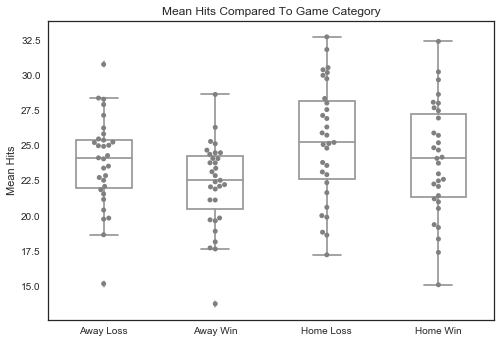

In [111]:
create_boxplot_with_points(df,'hits')

# Shots vs Game Category

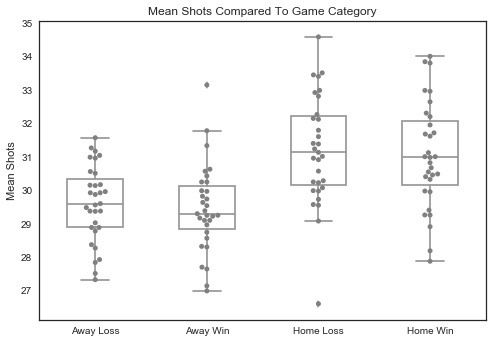

In [112]:
create_boxplot_with_points(df,'shots')

# Power Play Opportunities vs Game Category

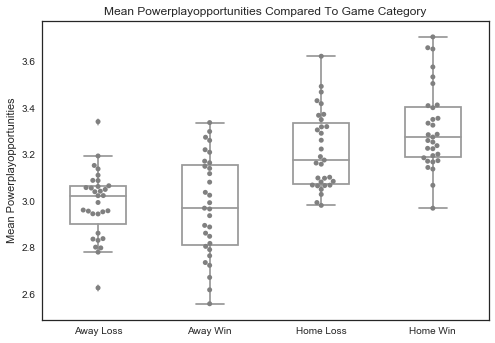

In [117]:
create_boxplot_with_points(df,'powerPlayOpportunities')

# Power Play Goals vs Game Category

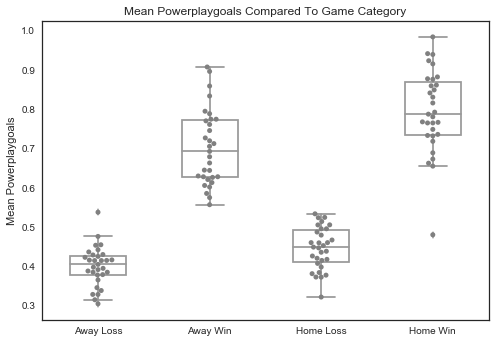

In [118]:
create_boxplot_with_points(df,'powerPlayGoals')

# Giveaways vs Game Category

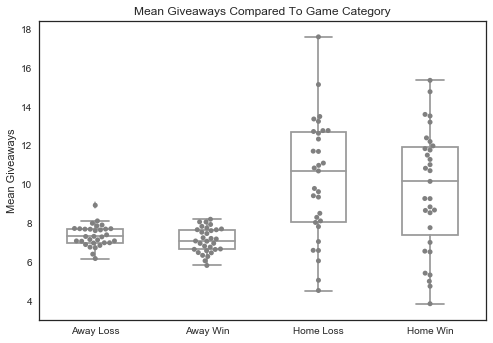

In [119]:
create_boxplot_with_points(df,'giveaways')

# Takeaways vs Game Category

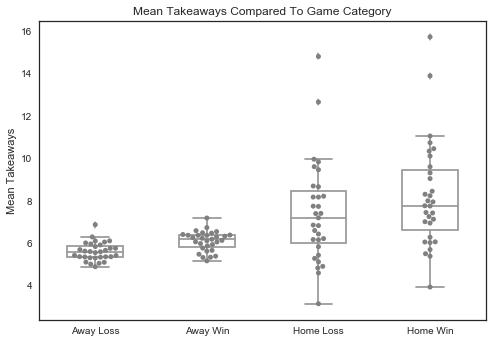

In [120]:
create_boxplot_with_points(df,'takeaways')

In [15]:
df.head()

home_goals           away_goals               shots  \
                                std      mean        std      mean       std   
teamName   game_category                                                       
Avalanche  Away Loss       1.451183  3.978873   1.041541  1.633803  6.254133   
           Away Win        1.107267  1.763441   1.160153  3.623656  5.284496   
           Home Loss       1.179189  1.858407   1.324786  3.938053  5.792531   
           Home Win        1.393278  3.902439   1.131027  1.821138  6.569927   
Blackhawks Away Loss       1.327240  3.953125   1.207318  1.695312  6.613146   

                                         hits             \
                               mean       std       mean   
teamName   game_category                                   
Avalanche  Away Loss      27.323944  8.694070  24.042254   
           Away Win       27.139785  8.390997  24.064516   
           Home Loss      29.548673  7.057064  22.353982   
           Home Win       31.000000  6.677686  21.430894   
Blackhawks Away Loss      30.148438  6.620309  15.171875   

                         powerPlayOpportunities           powerPlayGoals  \
                                            std      mean            std   
teamName   game_category                                                   
Avalanche  Away Loss                   1.447789  3.056338       0.517596   
           Away Win                    1.618182  2.967742       0.957000   
           Home Loss                   1.501579  3.318584       0.663287   
           Home Win                    1.528921  3.252033       0.800340   
Blackhawks Away Loss                   1.410642  2.796875       0.519075   

                                   faceOffWinPercentage            giveaways  \
                              mean                  std       mean       std   
teamName   game_category                                                       
Avalanche  Away Loss      0.338028             6.124549  46.935211  4.163644   
           Away Win       0.774194             7.032062  47.734409  3.816379   
           Home Loss      0.407080             7.822690  52.969027  3.015788   
           Home Win       0.731707             7.001675  51.017886  2.499847   
Blackhawks Away Loss      0.328125             7.288548  48.121094  4.658826   

                                   takeaways            
                              mean       std      mean  
teamName   game_category                                
Avalanche  Away Loss      7.309859  2.984828  4.887324  
           Away Win       6.978495  2.771490  5.333333  
           Home Loss      6.619469  4.046779  8.690265  
           Home Win       5.447154  3.834143  9.601626  
Blackhawks Away Loss      7.742188  3.442217  5.960938

In [16]:
corr = df.groupby('game_category').corr()

In [17]:
def make_mask(data):
    mask = np.zeros_like(data, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    return mask

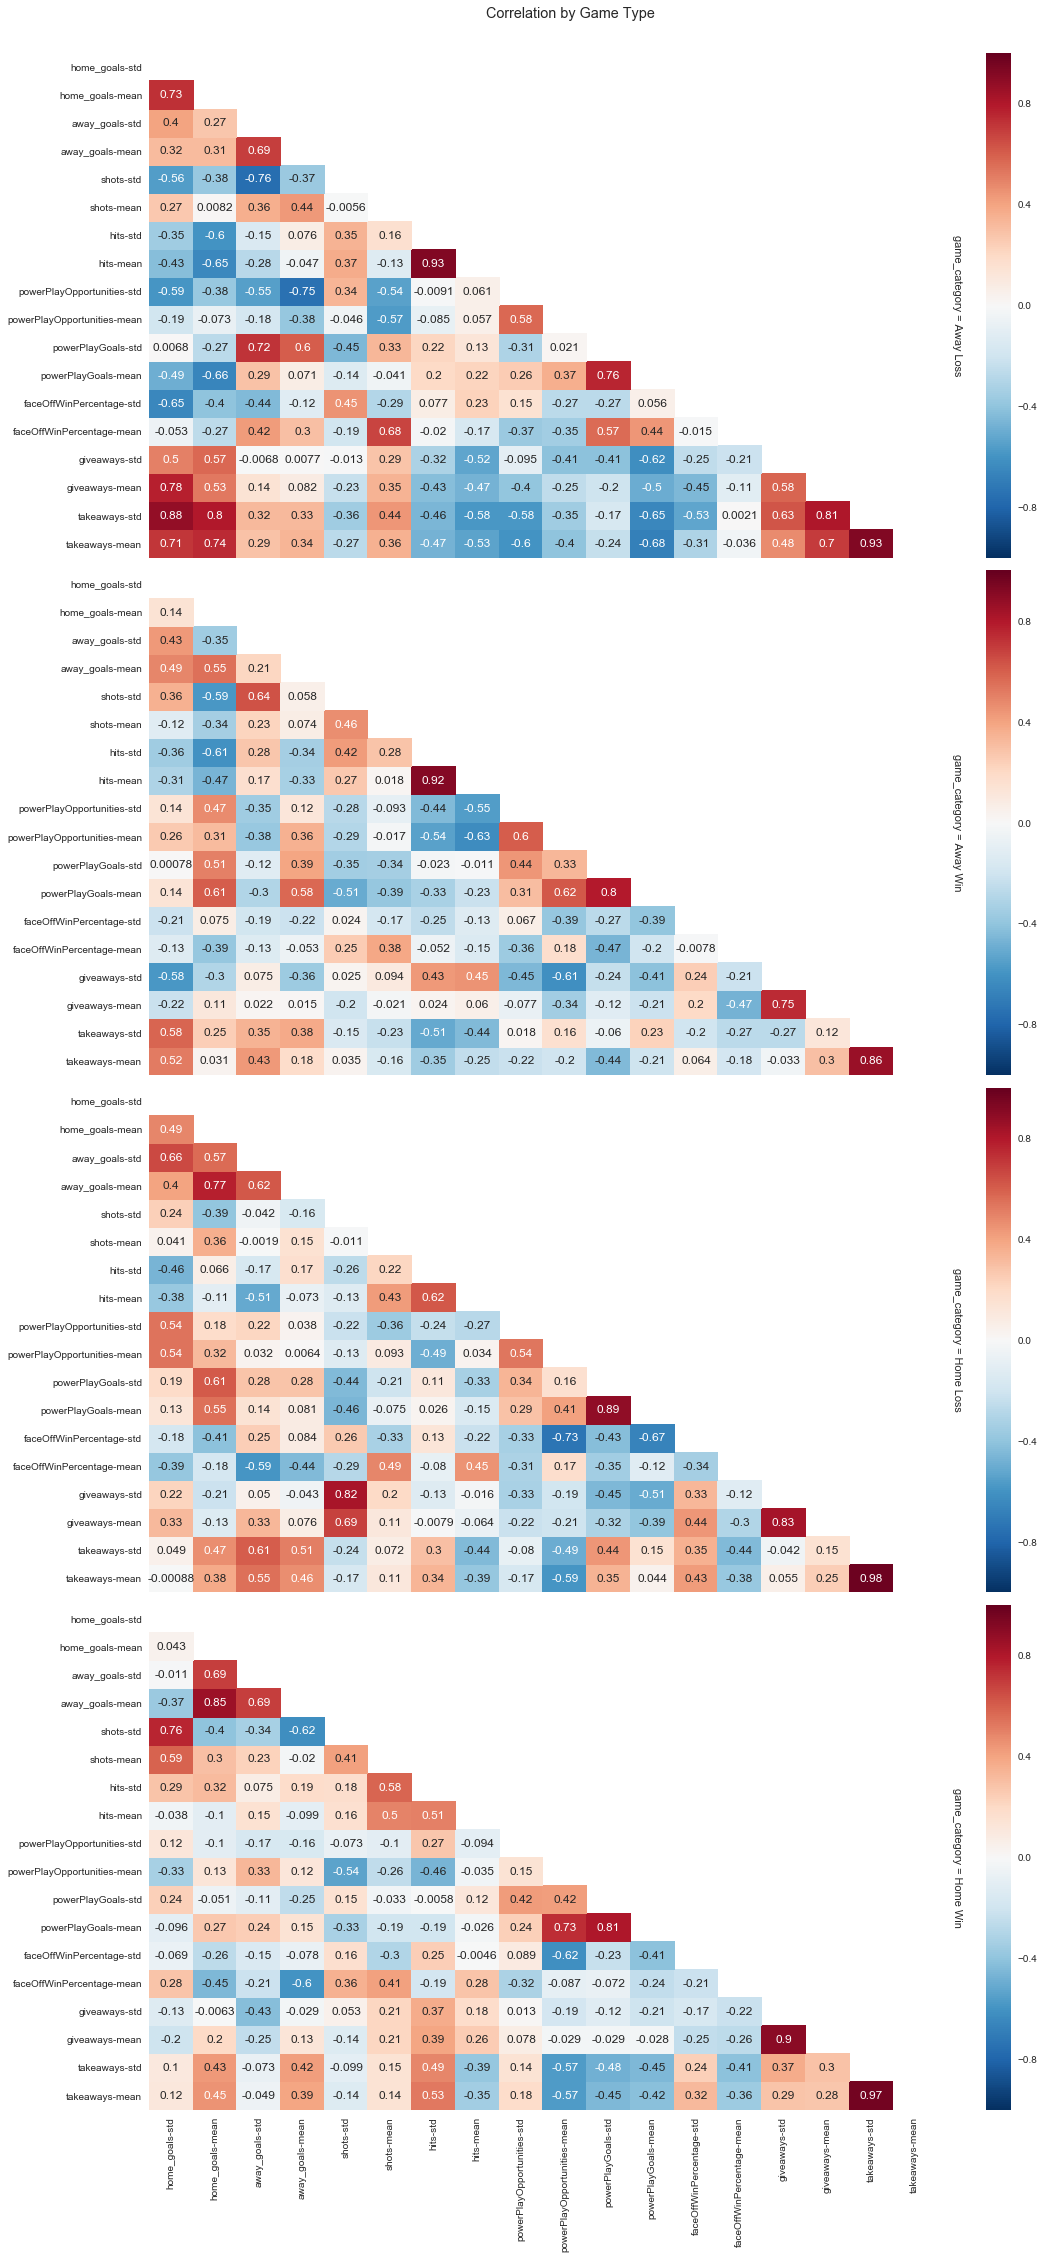

In [18]:
sns.set(style = 'white')
g = sns.FacetGrid(corr.reset_index(), row = "game_category", margin_titles=True, size=8, aspect=2)
g.map_dataframe(lambda data, color: sns.heatmap(data.corr(), linewidths=0, mask=make_mask(data.corr()),annot=True))
plt.subplots_adjust(top=0.96)
g.fig.suptitle('Correlation by Game Type')

pass

In [19]:
#Remove nan x positions
game_plays_position = game_plays[np.isfinite(game_plays['x'])]

#Convert a column to a datetime object
game_plays_position['dateTime'] = pd.to_datetime(game_plays_position['dateTime'])
#Create column of years from datetime Series
game_plays_position['year'] = game_plays_position['dateTime'].dt.year

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [20]:
game_plays_position.head()

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,...,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,year
1,2013020652_61,2013020652,61,27.0,20.0,Giveaway,NaN,58.0,39.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
5,2013020652_4,2013020652,4,27.0,20.0,Faceoff,NaN,0.0,0.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
6,2013020652_5,2013020652,5,27.0,20.0,Hit,NaN,90.0,-39.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
7,2013020652_6,2013020652,6,20.0,27.0,Shot,Backhand,-78.0,9.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
8,2013020652_7,2013020652,7,20.0,27.0,Shot,Slap Shot,-39.0,-31.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014


In [21]:
#Free up some memory
del game_shifts
del game_plays
del game_plays_players

In [22]:
#lets only look at hits
game_plays_goals = game_plays_position[game_plays_position['event'] == 'Goal'] 
game_plays_hits = game_plays_position[game_plays_position['event'] == 'Hit']

In [23]:
game_plays_goals.columns

Index(['play_id', 'game_id', 'play_num', 'team_id_for', 'team_id_against',
       'event', 'secondaryType', 'x', 'y', 'period', 'periodType',
       'periodTime', 'periodTimeRemaining', 'dateTime', 'goals_away',
       'goals_home', 'description', 'st_x', 'st_y', 'rink_side', 'season',
       'type', 'date_time', 'away_team_id', 'home_team_id', 'away_goals',
       'home_goals', 'outcome', 'home_rink_side_start', 'venue', 'venue_link',
       'venue_time_zone_id', 'venue_time_zone_offset', 'venue_time_zone_tz',
       'year'],
      dtype='object')

In [24]:
game_plays_goals.head()

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,...,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,year
122,2013020652_123,2013020652,123,27.0,20.0,Goal,Wrist Shot,-96.0,-9.0,2,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
129,2013020652_130,2013020652,130,27.0,20.0,Goal,Wrist Shot,-71.0,8.0,2,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
179,2013020652_180,2013020652,180,27.0,20.0,Goal,Wrist Shot,-72.0,-24.0,2,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
261,2013020652_262,2013020652,262,27.0,20.0,Goal,Wrist Shot,80.0,3.0,3,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
307,2013020652_308,2013020652,308,27.0,20.0,Goal,Slap Shot,51.0,-21.0,3,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014


In [25]:
#Seems like there is some issue with data type per some reading online.  Needs to be float not an object
cols = ['x', 'y']
game_plays_position[cols] = game_plays_position[cols].astype(float)

In [26]:
game_plays_position.head()

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,...,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,year
1,2013020652_61,2013020652,61,27.0,20.0,Giveaway,NaN,58.0,39.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
5,2013020652_4,2013020652,4,27.0,20.0,Faceoff,NaN,0.0,0.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
6,2013020652_5,2013020652,5,27.0,20.0,Hit,NaN,90.0,-39.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
7,2013020652_6,2013020652,6,20.0,27.0,Shot,Backhand,-78.0,9.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
8,2013020652_7,2013020652,7,20.0,27.0,Shot,Slap Shot,-39.0,-31.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014


# Create home goals vs away goals by team

In [27]:
game_plays_position.columns

Index(['play_id', 'game_id', 'play_num', 'team_id_for', 'team_id_against',
       'event', 'secondaryType', 'x', 'y', 'period', 'periodType',
       'periodTime', 'periodTimeRemaining', 'dateTime', 'goals_away',
       'goals_home', 'description', 'st_x', 'st_y', 'rink_side', 'season',
       'type', 'date_time', 'away_team_id', 'home_team_id', 'away_goals',
       'home_goals', 'outcome', 'home_rink_side_start', 'venue', 'venue_link',
       'venue_time_zone_id', 'venue_time_zone_offset', 'venue_time_zone_tz',
       'year'],
      dtype='object')

In [28]:
#By season, by game_id
season_scores = game_plays_position.groupby(['year', 'game_id'])[['goals_home', 'goals_away']].max()
season_scores.groupby('year')[['goals_home', 'goals_away']].mean()

,goals_home,goals_away
year,,
2013,2.802888,2.476534
2014,2.830806,2.525140
2015,2.740941,2.516577
2016,2.803089,2.548263
2017,2.944694,2.646487
2018,3.068365,2.843164


In [29]:
import re

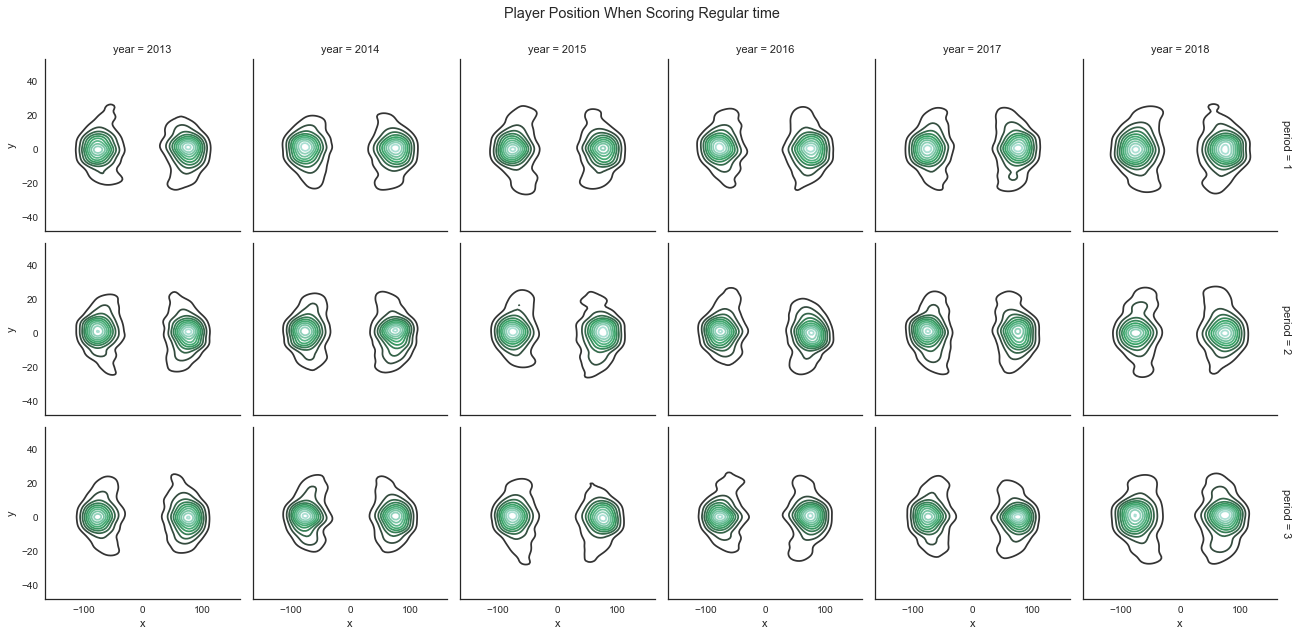

In [30]:
#Let's look at where all the Goals have occurred on the ice during regular game play time only (periods 1 - 3)
reg_time = game_plays_goals[game_plays_goals['period'] <=3]

#This took forever to run on my computer but eventually showed up!
sns.set(style = 'white')
g = sns.FacetGrid(reg_time, col = "year", row = 'period', margin_titles=True)
g.map(sns.kdeplot, 'x', 'y')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Player Position When Scoring Regular time')

#We can iterate through the various subplots to change labels and titles if we want

#axes = g.axes.flatten()
#axes[1].set_title('Player Position When Scoring Regular time')
#axes[1].set_ylabel('Y coordinate')
#axes[1].set_xlabel('X coordinate')

# It will be necessary to figure out how to identify the scoring team for each play.  I think thats in the gameshifts table and we can join on home team with the list of players scoring or with a regex expression

In [31]:
#Add team name to scoring team goals
goals_by_team = pd.merge(game_plays_goals, team_info, how='inner', left_on='team_id_for', right_on='team_id')

#Only keep the max number of goals (game ending scores)
goals_by_team = goals_by_team.groupby(['teamName','game_id']).max()

#Look at mean goal differential as well as plus 1 standard deviation and minus 1 standard deviation
goals_by_team_summarized = goals_by_team.groupby('teamName').agg({'goals_home':['std','mean'],
                                                                   'goals_away':['std','mean']})
goals_by_team_summarized['goal_differential'] = goals_by_team_summarized['goals_home']['mean'] - goals_by_team_summarized['goals_away']['mean']

goals_by_team_summarized['goal_differential_p1std'] = (goals_by_team_summarized['goals_home']['mean'] + goals_by_team_summarized['goals_home']['std']) - \
    (goals_by_team_summarized['goals_away']['mean'] + goals_by_team_summarized['goals_away']['std'])

goals_by_team_summarized['goal_differential_m1std'] = (goals_by_team_summarized['goals_home']['mean'] - goals_by_team_summarized['goals_home']['std']) - \
    (goals_by_team_summarized['goals_away']['mean'] - goals_by_team_summarized['goals_away']['std'])

#Sort by goal differential
goals_by_team_summarized = goals_by_team_summarized.sort_values('goal_differential', ascending=False)
goals_by_team_summarized = goals_by_team_summarized[['goal_differential_m1std','goal_differential','goal_differential_p1std']]

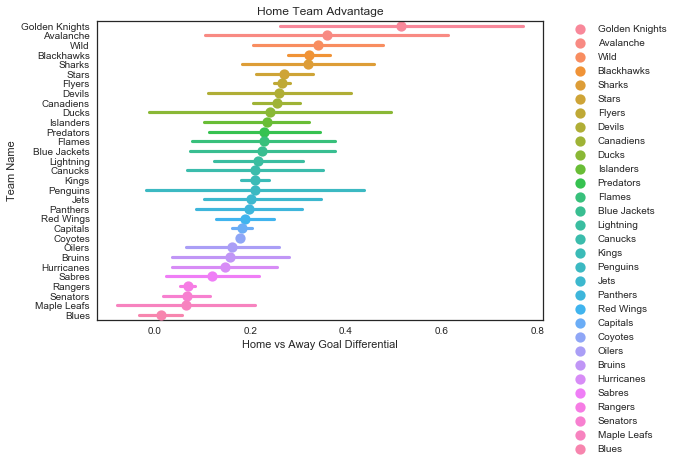

In [32]:
#Create the long version dataframe to see a line for each team
df = goals_by_team_summarized.reset_index()
df_long = df.melt(id_vars=['teamName'], var_name='goal_differential')

#Create a plot of team & goal differentials
sns.set(style = 'white')
ax = sns.pointplot(x="value", y="teamName", hue = "teamName", data=df_long, join=False, size=8, aspect = 2)
ax.set(xlabel='Home vs Away Goal Differential', ylabel='Team Name', title = 'Home Team Advantage')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

pass

# What if we look for advantage by year?

In [33]:
#Add team name to scoring team goals
goals_by_team = pd.merge(game_plays_goals, team_info, how='inner', left_on='team_id_for', right_on='team_id')

#Only keep the max number of goals (game ending scores)
goals_by_team = goals_by_team.groupby(['teamName','game_id']).max()

#Look at mean goal differential as well as plus 1 standard deviation and minus 1 standard deviation
goals_by_team_summarized = goals_by_team.groupby(['teamName','year']).agg({'goals_home':['std','mean'],
                                                                   'goals_away':['std','mean']})

goals_by_team_summarized['goal_differential'] = goals_by_team_summarized['goals_home']['mean'] - goals_by_team_summarized['goals_away']['mean']

goals_by_team_summarized['goal_differential_p1std'] = (goals_by_team_summarized['goals_home']['mean'] + goals_by_team_summarized['goals_home']['std']) - \
    (goals_by_team_summarized['goals_away']['mean'] + goals_by_team_summarized['goals_away']['std'])

goals_by_team_summarized['goal_differential_m1std'] = (goals_by_team_summarized['goals_home']['mean'] - goals_by_team_summarized['goals_home']['std']) - \
    (goals_by_team_summarized['goals_away']['mean'] - goals_by_team_summarized['goals_away']['std'])

#Sort by goal differential
goals_by_team_summarized = goals_by_team_summarized.sort_values('goal_differential', ascending=False)
goals_by_team_summarized = goals_by_team_summarized[['goal_differential_m1std','goal_differential','goal_differential_p1std']]

In [34]:
#Create the long version dataframe to see a line for each team
df = goals_by_team_summarized.reset_index()
df_long = df.melt(id_vars=['teamName','year'], var_name='var_name')

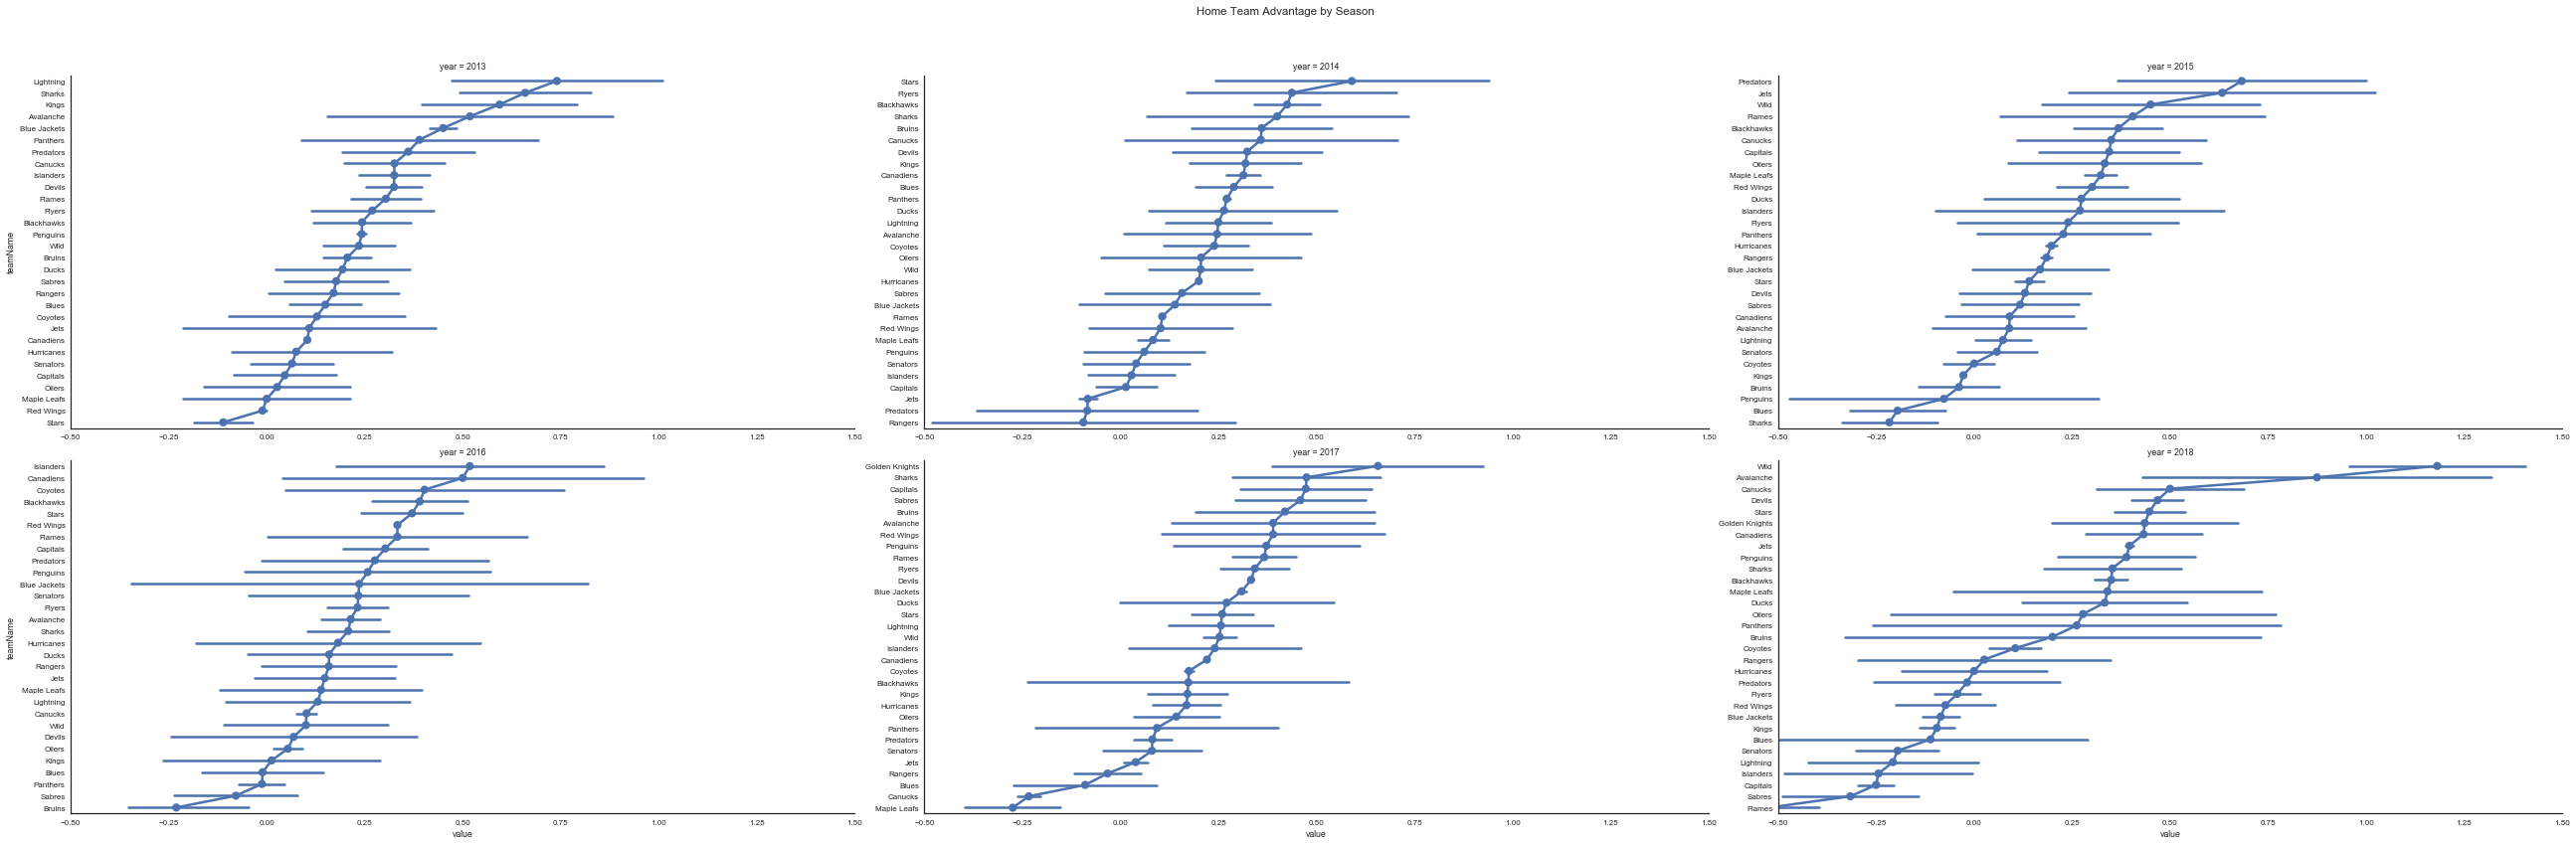

In [35]:
sns.set(style = 'white')
sns.set_context("paper") 
g = sns.FacetGrid(df_long, col = "year", margin_titles=True, size=6, aspect=2, sharey=False, sharex=False, col_wrap=3)
g.map(sns.pointplot, 'value', 'teamName')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Home Team Advantage by Season')
axes = g.axes
for plot in axes:
    plot.set_xlim(-0.5,1.5)
pass

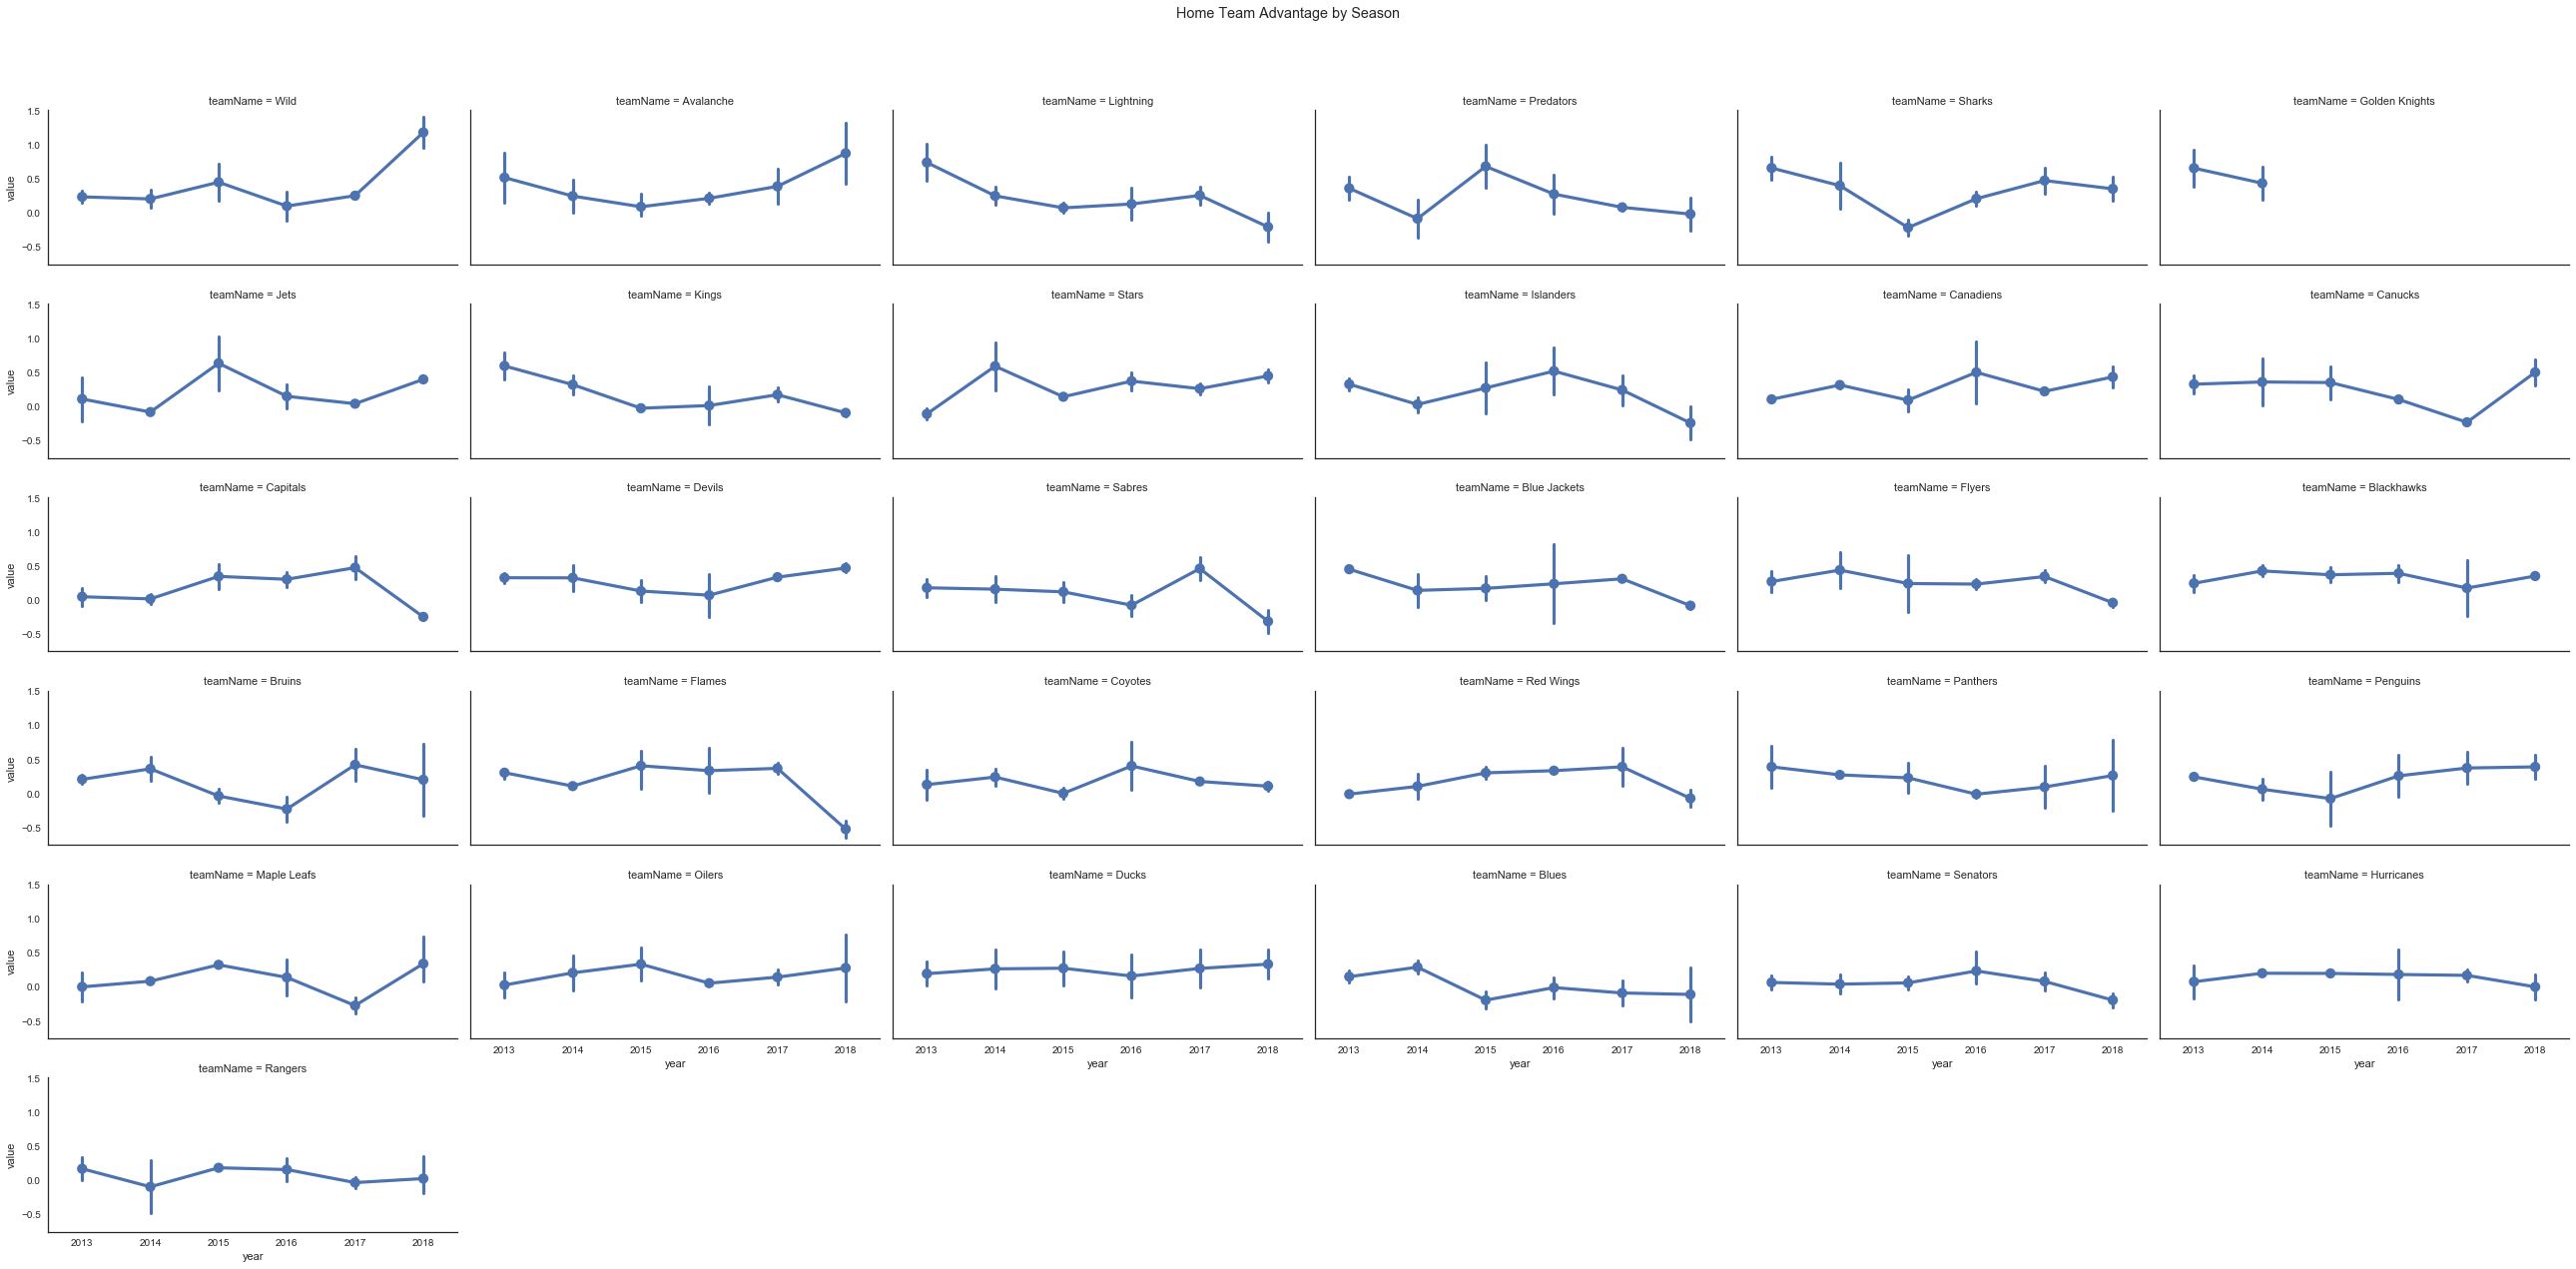

In [36]:
sns.set(style = 'white')
g = sns.FacetGrid(df_long, col = "teamName", col_wrap=6, margin_titles=True, size=3, aspect=2)
g.map(sns.pointplot, 'year', 'value')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Home Team Advantage by Season')
pass

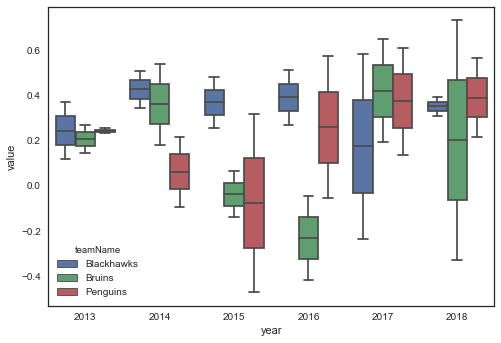

In [37]:
#Penguins Advantage by Year
sns.boxplot(x="year", y="value",
            hue="teamName",
            data=df_long[(df_long['teamName']=='Penguins') | (df_long['teamName']=='Bruins') | (df_long['teamName']=='Blackhawks')])
pass

# How does the advantage work out when we examine different venues

In [38]:
#We will now look at differences in time zones
venue_by_team = pd.merge(game_plays_goals, team_info, how='inner', left_on='home_team_id', right_on='team_id')
#venue_by_team = pd.merge(venue_by_team, team_info, how='inner', left_on='home_team_id', right_on='team_id')

#Add in the venue of the away team as well
goals_by_team = pd.merge(game_plays_goals, team_info, how='inner', left_on='away_team_id', right_on='team_id')


In [39]:
#Find the venue for each team
venue_by_team = venue_by_team.groupby(['teamName','venue_time_zone_offset']).sum().reset_index()[['teamName','venue_time_zone_offset']]

In [40]:
goals_by_team = pd.merge(goals_by_team, venue_by_team, left_on='teamName', right_on='teamName')

In [41]:
goals_by_team['timezone_diff'] = goals_by_team['venue_time_zone_offset_x'] - goals_by_team['venue_time_zone_offset_y']

In [42]:
#Only keep the max number of goals (game ending scores)
goals_by_team = goals_by_team.groupby(['teamName','game_id']).max()

#Look at mean goal differential as well as plus 1 standard deviation and minus 1 standard deviation
goals_by_team_summarized = goals_by_team.groupby(['timezone_diff','year']).agg({'goals_home':['std','mean'],
                                                                   'goals_away':['std','mean']})

goals_by_team_summarized['goal_differential'] = goals_by_team_summarized['goals_home']['mean'] - goals_by_team_summarized['goals_away']['mean']

goals_by_team_summarized['goal_differential_p1std'] = (goals_by_team_summarized['goals_home']['mean'] + goals_by_team_summarized['goals_home']['std']) - \
    (goals_by_team_summarized['goals_away']['mean'] + goals_by_team_summarized['goals_away']['std'])

goals_by_team_summarized['goal_differential_m1std'] = (goals_by_team_summarized['goals_home']['mean'] - goals_by_team_summarized['goals_home']['std']) - \
    (goals_by_team_summarized['goals_away']['mean'] - goals_by_team_summarized['goals_away']['std'])

#Sort by goal differential
goals_by_team_summarized = goals_by_team_summarized.sort_values('goal_differential', ascending=False)
goals_by_team_summarized = goals_by_team_summarized[['goal_differential_m1std','goal_differential','goal_differential_p1std']]

In [43]:
#Create the long version dataframe to see a line for each team
df = goals_by_team_summarized.reset_index()
df_long = df.melt(id_vars=['timezone_diff','year'], var_name='var_name')

In [44]:
df.head()

,timezone_diff,year,goal_differential_m1std,goal_differential,goal_differential_p1std
,,,,,
0,-3,2013,0.620736,1.145455,1.670173
1,2,2015,0.580013,0.877551,1.175089
2,-1,2018,0.581928,0.725275,0.868622
3,2,2016,0.094131,0.611111,1.128091
4,-1,2013,0.365301,0.609195,0.853089


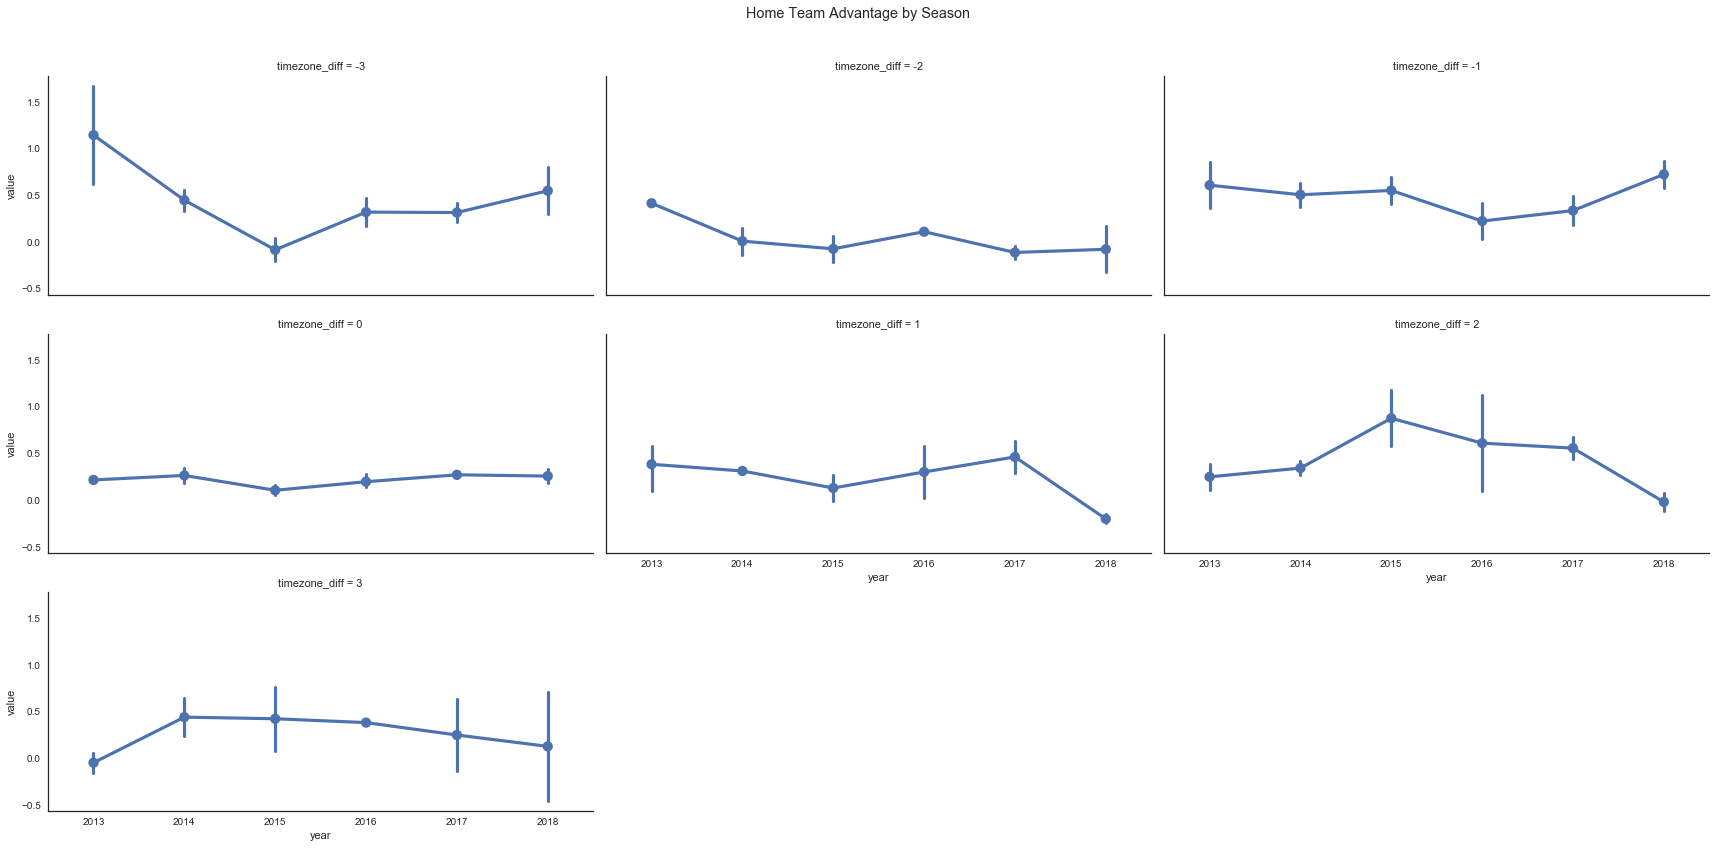

In [45]:
sns.set(style = 'white')
g = sns.FacetGrid(df_long, col = "timezone_diff", margin_titles=True, col_wrap=3,size=4, aspect=2)
g.map(sns.pointplot, 'year', 'value')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Home Team Advantage by Season')
pass

In [46]:
home_goals_by_team = goals_by_team[goals_by_team['home_team_id']==goals_by_team['team_id_for']]
away_game_plays_goals = goals_by_team[goals_by_team['away_team_id']==goals_by_team['team_id_for']]

In [47]:
#Split into home and away goals
home_game_plays_goals = game_plays_goals[game_plays_goals['home_team_id']==game_plays_goals['team_id_for']]
away_game_plays_goals = game_plays_goals[game_plays_goals['away_team_id']==game_plays_goals['team_id_for']]

In [48]:
home_game_plays_goals.head()

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,...,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,year
122,2013020652_123,2013020652,123,27.0,20.0,Goal,Wrist Shot,-96.0,-9.0,2,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
129,2013020652_130,2013020652,130,27.0,20.0,Goal,Wrist Shot,-71.0,8.0,2,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
179,2013020652_180,2013020652,180,27.0,20.0,Goal,Wrist Shot,-72.0,-24.0,2,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
261,2013020652_262,2013020652,262,27.0,20.0,Goal,Wrist Shot,80.0,3.0,3,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
307,2013020652_308,2013020652,308,27.0,20.0,Goal,Slap Shot,51.0,-21.0,3,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014


In [49]:
home_game_plays_goals.columns

Index(['play_id', 'game_id', 'play_num', 'team_id_for', 'team_id_against',
       'event', 'secondaryType', 'x', 'y', 'period', 'periodType',
       'periodTime', 'periodTimeRemaining', 'dateTime', 'goals_away',
       'goals_home', 'description', 'st_x', 'st_y', 'rink_side', 'season',
       'type', 'date_time', 'away_team_id', 'home_team_id', 'away_goals',
       'home_goals', 'outcome', 'home_rink_side_start', 'venue', 'venue_link',
       'venue_time_zone_id', 'venue_time_zone_offset', 'venue_time_zone_tz',
       'year'],
      dtype='object')

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


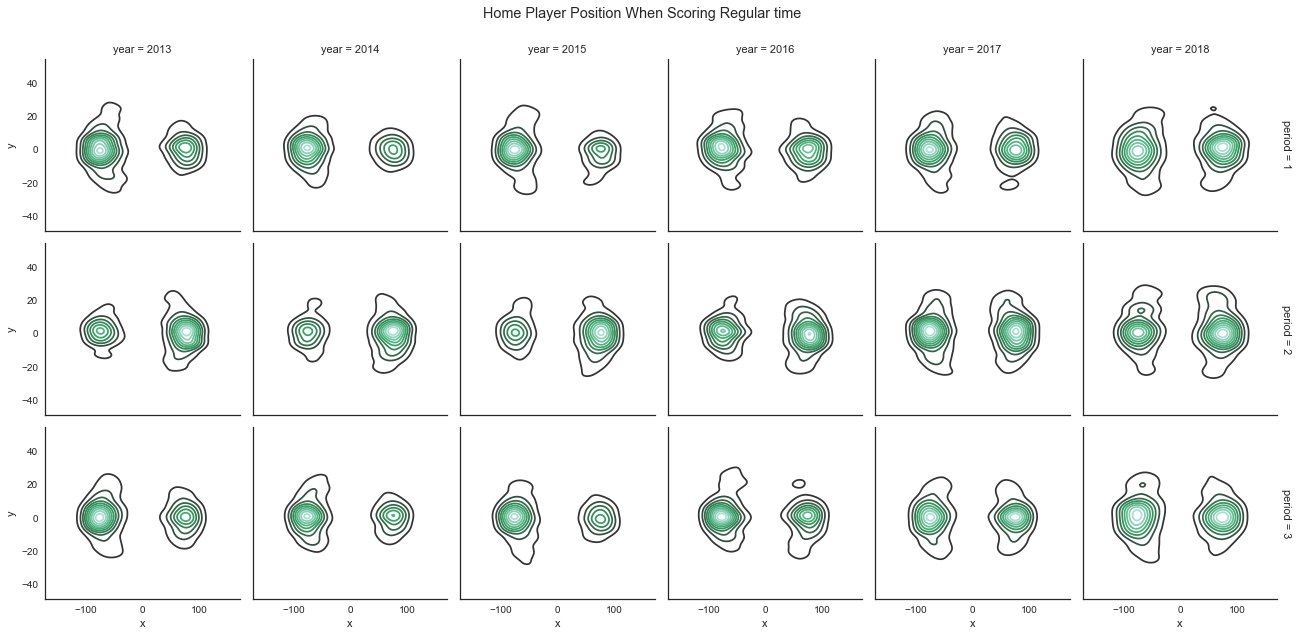

In [50]:
#Let's look at where all the Goals have occurred on the ice FOR HOME TEAM during regular play
home_reg_time = home_game_plays_goals[game_plays_goals['period'] <=3]

#This took forever to run on my computer but eventually showed up!
sns.set(style = 'white')
g = sns.FacetGrid(home_reg_time, col = "year", row = 'period', margin_titles=True)
g.map(sns.kdeplot, 'x', 'y')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Home Player Position When Scoring Regular time')
pass

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


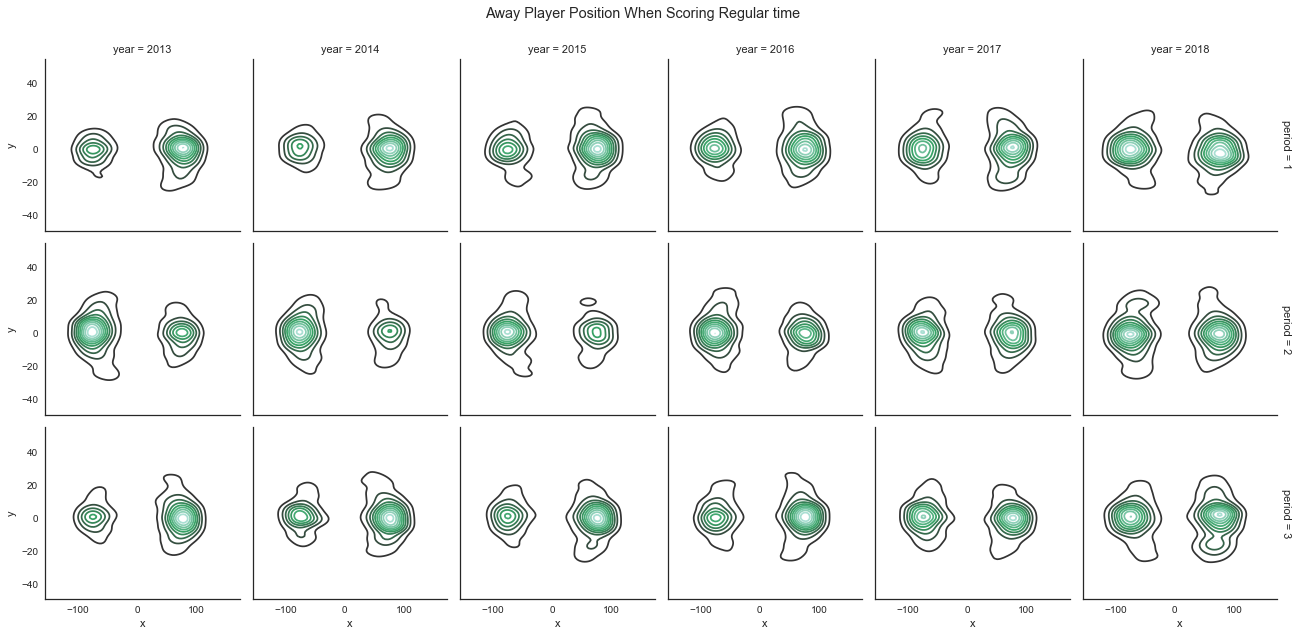

In [51]:
#Let's look at where all the Goals have occurred on the ice FOR AWAY TEAM
away_reg_time = away_game_plays_goals[game_plays_goals['period'] <=3]

#This took forever to run on my computer but eventually showed up!
sns.set(style = 'white')
g = sns.FacetGrid(away_reg_time, col = "year", row = 'period', margin_titles=True)
g.map(sns.kdeplot, 'x', 'y')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Away Player Position When Scoring Regular time')
pass

In [52]:
who

away_game_plays_goals	 away_reg_time	 ax	 axes	 cols	 corr	 df	 df_long	 g	 
game	 game_and_stats	 game_goalie_stats	 game_plays_goals	 game_plays_hits	 game_plays_position	 game_skater_stats	 game_teams_stats	 goalie_team	 
goals_by_team	 goals_by_team_summarized	 home_game_plays_goals	 home_goals_by_team	 home_reg_time	 img	 imgplot	 make_mask	 mpimg	 
np	 pd	 player_info	 plot	 plt	 re	 reg_time	 season_scores	 skater_team	 
sns	 team_info	 venue_by_team	 


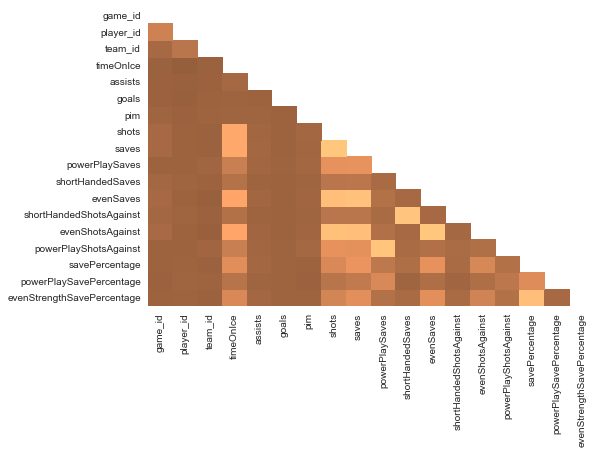

In [53]:
#Goalie Stats Correlation Heatmap
c = game_goalie_stats.corr()
mask = np.ones_like(c)
mask = np.triu(mask)
sns.set(style = 'white')
sns.heatmap(c, cmap = 'copper', mask=mask, cbar=False)
pass

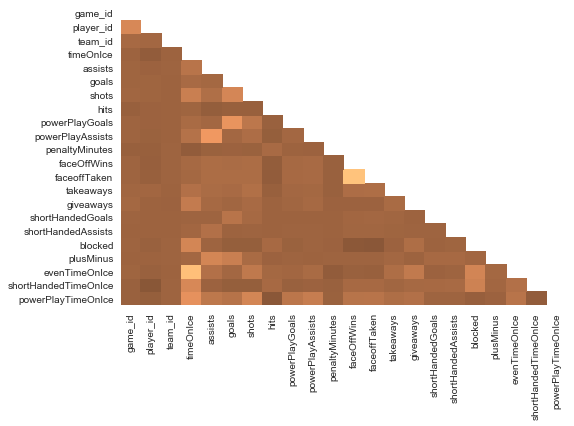

In [54]:
#Player Stats Correlation Heatmap
c = game_skater_stats.corr()
mask = np.ones_like(c)
mask = np.triu(mask)
sns.set(style = 'white')
sns.heatmap(c, cmap = 'copper', mask=mask, cbar=False)
pass

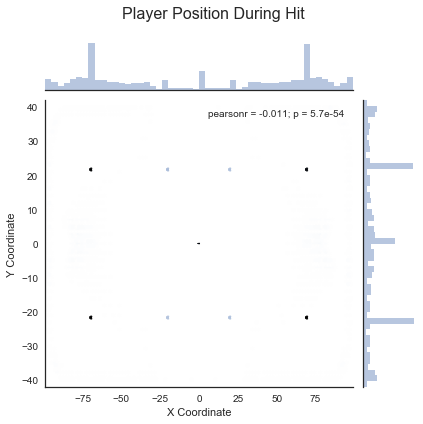

In [55]:
#Where do hits occur on the ice
g = sns.jointplot('x', 'y', data=game_plays_position, kind="hex")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Player Position During Hit', fontsize=16)
g.set_axis_labels('X Coordinate','Y Coordinate')
pass

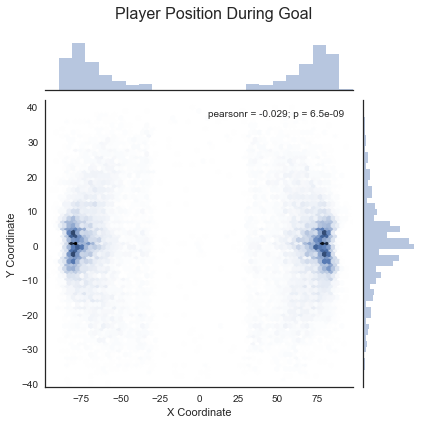

In [56]:
#How about goals?
g = sns.jointplot('x', 'y', data=game_plays_goals, kind="hex")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Player Position During Goal', fontsize=16)
g.set_axis_labels('X Coordinate','Y Coordinate')
pass

The above graph is assymetrical along the y axis.  It would appear that there is some bias in terms of handedness?

# This linke has some nice visualizations we could try 
https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html

Heat maps:

https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [57]:
#Shots taken by team
skater_team.groupby('teamName').mean()['shots']

teamName
Avalanche         1.598631
Blackhawks        1.790158
Blue Jackets      1.678713
Blues             1.660202
Bruins            1.795207
Canadiens         1.682508
Canucks           1.624718
Capitals          1.664878
Coyotes           1.621422
Devils            1.514399
Ducks             1.683023
Flames            1.609584
Flyers            1.692872
Golden Knights    1.805556
Hurricanes        1.741568
Islanders         1.730867
Jets              1.687196
Kings             1.722083
Lightning         1.653609
Maple Leafs       1.669572
Oilers            1.637018
Panthers          1.727458
Penguins          1.787052
Predators         1.700780
Rangers           1.708486
Red Wings         1.645949
Sabres            1.570805
Senators          1.715123
Sharks            1.762894
Stars             1.706499
Wild              1.629662
Name: shots, dtype: float64

(array([ 1.,  1.,  1.,  4.,  3.,  7.,  5.,  4.,  1.,  4.]),
 array([ 1.51439885,  1.54351452,  1.57263019,  1.60174586,  1.63086153,
         1.6599772 ,  1.68909287,  1.71820854,  1.74732421,  1.77643988,
         1.80555556]),
 <a list of 10 Patch objects>)

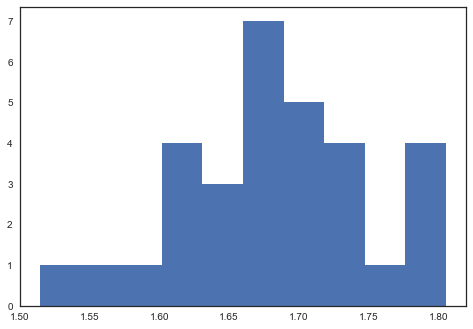

In [58]:
#Group by team
by_team = skater_team.groupby('teamName').mean()
plt.hist(skater_team.groupby('teamName').mean()['shots'])#.plot(legend=True)

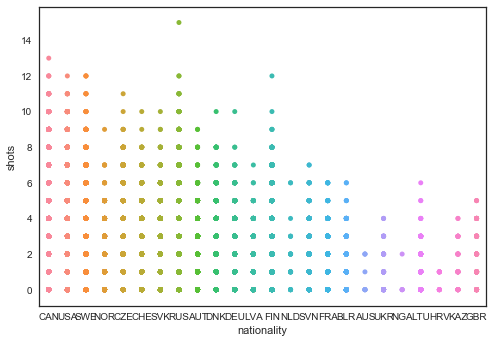

In [59]:
#Shots by nationality
g = sns.stripplot(x='nationality', y = 'shots', data=skater_team)

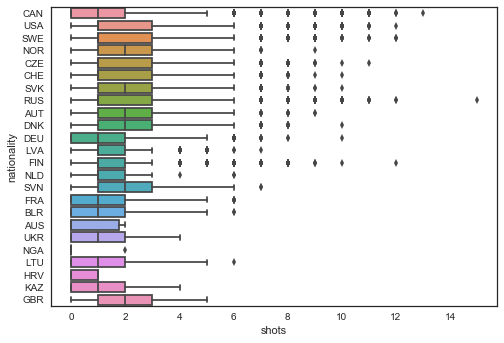

In [60]:
#Shots by nationality
g = sns.boxplot(x='shots', y='nationality', data=skater_team)

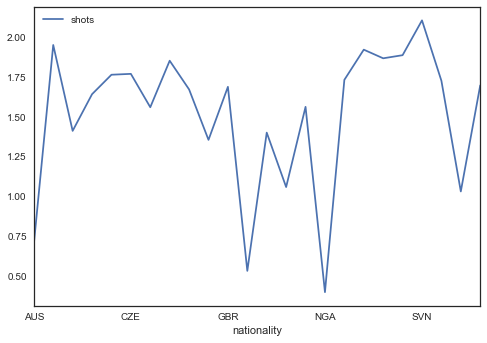

In [61]:
#Group skaters by nationality
by_country = skater_team.groupby('nationality').mean()
skater_team.groupby('nationality').mean()['shots'].plot(legend=True)
pass

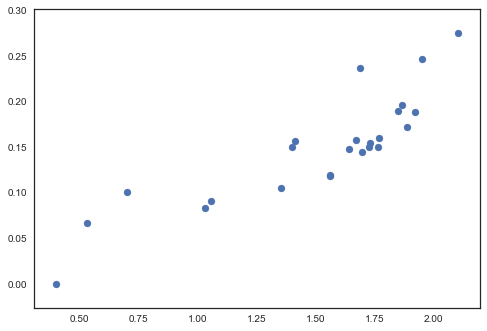

In [62]:
#Shots vs Goals
plt.scatter(by_country['shots'],by_country['goals'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022A01A77470>]], dtype=object)

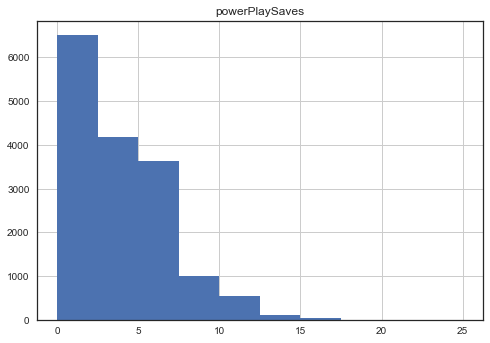

In [63]:
goalie_team.hist('powerPlaySaves')

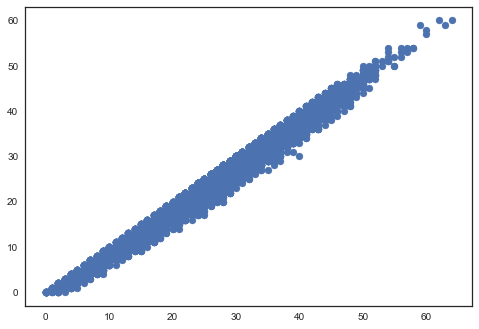

In [64]:
plt.scatter(goalie_team['shots'], goalie_team['saves'])

In [65]:
game_goalie_stats.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,decision,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage
0,2012030221,8468685,3,4540,0,0,0,48,45,10,1,34,1,36,11,L,93.750000,90.909091,94.444444
1,2012030221,8471695,6,4540,0,0,0,35,33,3,0,30,0,32,3,W,94.285714,100.000000,93.750000
2,2012030222,8468685,3,3600,0,0,0,32,27,1,2,24,2,29,1,L,84.375000,100.000000,82.758621
3,2012030222,8471695,6,3600,0,0,0,37,35,7,1,27,1,29,7,W,94.594595,100.000000,93.103448
4,2012030223,8471695,6,3600,0,0,0,24,23,2,0,21,0,22,2,W,95.833333,100.000000,95.454545
